### 1. 머신러닝 개요

#### 1-1. 머신러닝이란 ?

- 머신러닝 : 기계 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정
- 예측, 분류, 군집 알고리즘 등으로 분류됨.
- ex ) 경제지표 예측, 고객 분류, 비슷한 소비패턴 가진 고객 유형 군집으로 묶기

#### 1-2. 지도학습 vs 비지도 학습

- 지도학습 : 정답 데이터를 다른 데이터와 함께 알고리즘에 입력하는 방식
    - 모형 평가 방법이 다양한 편
    - 회귀분석, 분류 모형
- 비지도학습 : 정답 데이터 없이 알고리즘 스스로 데이터로부터 숨은 패턴 찾아내는 방식
    - 모형 평가 방법이 제한적
    - 군집 분석

#### 1-3. 머신러닝 프로세스

1. 데이터 분석 전 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터 변환 필요
    분석 대상에 관해 수집한 관측값을 속성 기준으로 정리
    -> 판다스 이용해 데이터프레임으로 정리하는 과정
    - 열 : 속성 나타내는 변수
    - 행 : 하나의 관측값
2. 여러 속성(변수) 간 관계 분석하여 결과 예측하는 모형 학습을 통해 찾기
    - 훈련데이터(train) : 모형 학습에 사용하는 데이터
    - 검증데이터(test) : 학습 마친 모형 예측 능력 평가하기 위한 데이터
3. 모형의 예측 능력 평가
4. 평가 결과를 바탕으로 최종 모형 확정 -> 문제 해결에 적용

### 2. 회귀분석 

- 머신러닝 알고리즘 중 비교적 이해가 쉽고, 널리 활용됨.
- 가격, 매출, 주가, 환율 등 연속 변수를 예측하는데 주로 활용
- 종속변수/예측변수 : 모형이 예측하고자 하는 목표
- 독립변수/설명변수 : 예측을 위해 모형이 사용하는 속성

##### 2-1. 단순회귀분석 

- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘
- 대표적 지도학습 유형
- 훈련 데이터를 이용해 직선의 기울기와 y절편을 반복학습을 통해 찾는다.     
  **=> x,y에 대한 정보를 가지고 일차 방정식의 계수 a,b 찾는 과정 (y=ax+b)**

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 데이터 준비
df = pd.read_csv('./data/auto-mpg.csv', header = None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration','model year','origin','name']

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
# Step2 데이터 탐색

# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# 통계 요약 정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# horsepower 열 자료형 변경
print(df['horsepower'].unique()) # 고유값 확인

df['horsepower'].replace('?', np.nan, inplace=True) # '?' -> np.nan 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열 -> 실수형

print(df.describe)

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0        

In [8]:
# Step 3 속성 선택

# 예측 목표인 종속 변수가 될 mpg와 독립 변수로 사용할 후보로 cylinders,horsepower,weight 포함
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


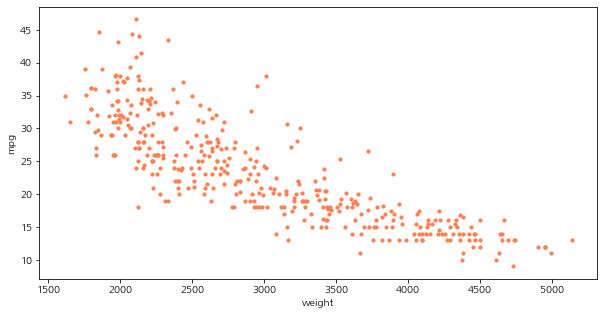

In [9]:
# 변수 간 선형관계 산점도로 확인 - matplotlib
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

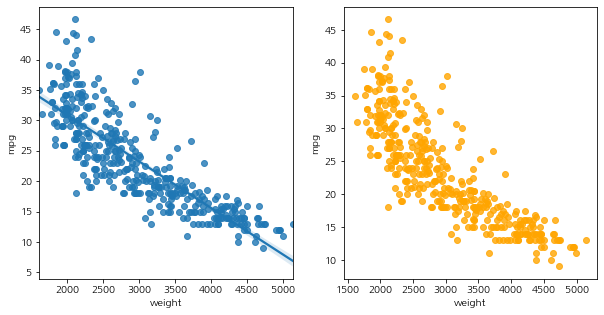

In [11]:
# 변수 간 선형관계 산점도로 확인 - seaborn
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg', data=ndf, ax=ax1) # 회귀선 표시
sns.regplot(x='weight',y='mpg', data=ndf, ax=ax2, fit_reg=False, color='orange') # 회귀선 미표시

plt.show()

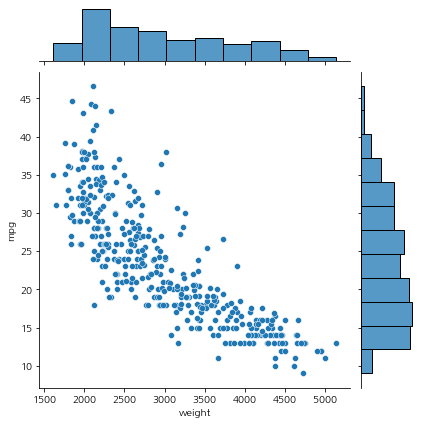

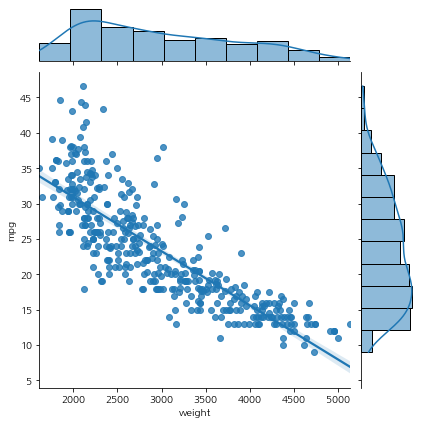

In [12]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight',y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg') # 회귀선 표시
plt.show()

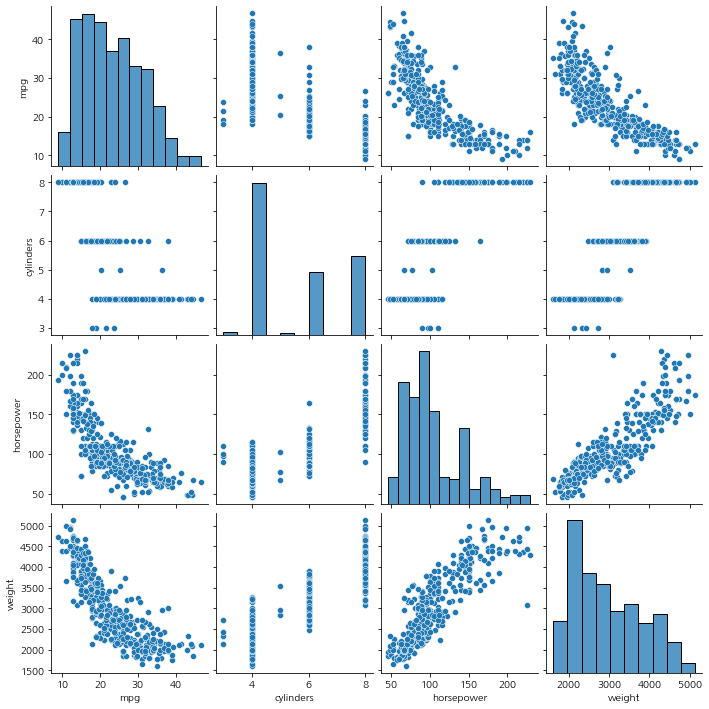

In [13]:
# seabron pair plot으로 두 변수 간 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()

In [16]:
# Step 4 데이터셋 구분 - 훈련용/검증용

# 속성 선택 - mpg와 선형관계를 보이는 horsepower, weight 선택
# weight를 독립 변수로 선택, 데이터 7:3의 비율로 분할
X = ndf[['weight']]
y = ndf[['mpg']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 10)

print('train data 개수 : ', len(X_train))
print('test data 개수 : ', len(X_test))

train data 개수 :  274
test data 개수 :  118


In [18]:
# Step 5 모형 학습 및 검증
# 단순회귀분석 모형 만들기 - sklearn

from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습 마친 모형에 test data 적용하여 결정계수 계산
r_square = lr.score(X_test, y_test)
print(r_square)
# 결정계수 값이 클수록 모형의 예측능력이 좋다고 판단

0.6822458558299325


In [19]:
# 회귀식 기울기
print('기울기 a : ', lr.coef_)
# 회귀식 y절편
print('y절편 b : ', lr.intercept_)

기울기 a :  [[-0.00775343]]
y절편 b :  [46.71036626]


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


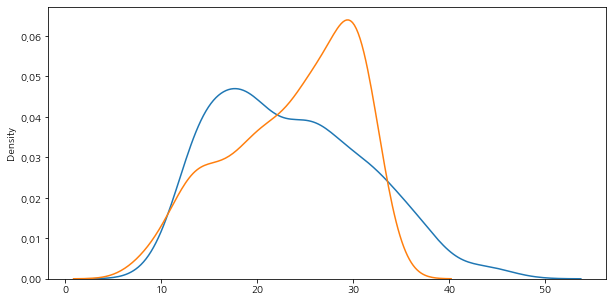

In [20]:
# 모형에 전체 X 데이터 입력해 예측한 값 y_hat을 실제 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
# 실제 값은 왼쪽으로 편항되어 있고, 예측값은 반대로 오른쪽으로 편중되는 경향을 보임
# 독립 변수외 종속변수 사이의 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보임.
# 앞의 산점도를 통해 직선보다는 곡선 형태의 모형이 적합함을 알 수 있음 
# -> 비선형 회귀분석을 통해 모형의 정확도 높이기

##### 2-2. 다항회귀분석

- 독립 변수 X와 종속 변수 Y 사이 선형의 상관관계가 있지만, 직선보다 곡선으로 설명하는 것이 더 적합한 경우
- 보다 복잡한 곡선 형태의 회귀선 표현 가능
- 2차함수 이상의 다항 함수를 이용해 두 변수 간의 선형관계 설명하는 알고리즘

In [21]:
# 데이터 준비 -> 2-1 의 데이터 활용
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [22]:
# 비선형회귀분석 모형 - sklearn 사용

# 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree = 2) # 2차항 객체 생성
X_train_poly = poly.fit_transform(X_train) # X_train 데이터 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [26]:
# train data로 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습 마친 모형에 test data 적용해 결정계수 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
r_square
# 단순회귀분석에 비해 결정계수가 높아짐 (0.68 -> 0.71)

0.7087009262975685

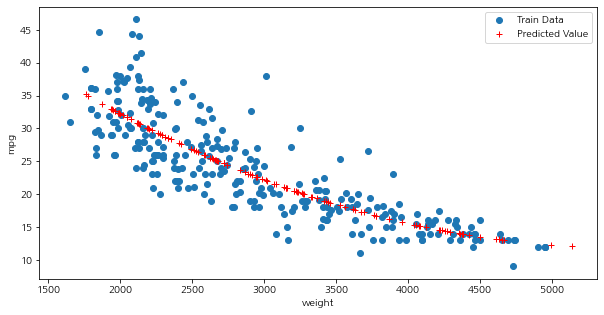

In [27]:
# train data의 산점도와 test data로 예측한 회귀선 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
# 단순회귀분석에 비해 데이터의 패턴을 더욱 잘 설명한다고 할 수 있음.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


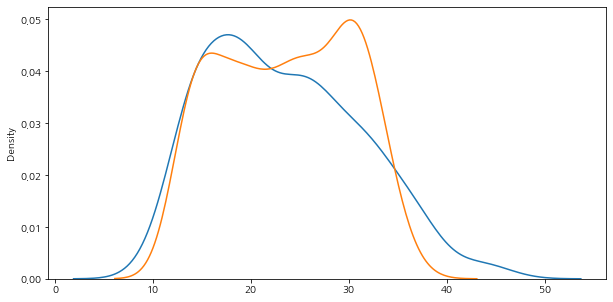

In [28]:
# 모형에 전체 X 데이터 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
# 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 알 수 있다. 

#### 2-3. 다중회귀분석

- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우
- Y = b + a1X1 + a2X2 + ... + anXn
- 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아 모형 완성함
- 종속 변수에 대해 실제 데이터를 아는 상태에서 학습하므로 지도학습으로 분류됨

In [29]:
# 데이터 셋 구분 - 훈련용/검증용

# 속성 선택
X = ndf[['cylinders', 'horsepower', 'weight']] # 독립 변수 X1, X2, X3
y = ndf['mpg'] # 종속 변수 Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [30]:
# 모형 학습 및 검증

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# 훈련 데이터로 모형 학습
lr.fit(X_train, y_train)

# 학습 마친 모형에 test data 적용해 결정계수 계산
r_squre = lr.score(X_test, y_test)
print(r_squre)

# 회귀식 기울기
print('X 변수의 계수 a: ', lr.coef_)
# 회귀식 y절편
print('상수항 b: ', lr.intercept_)

0.6939048496695597
X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]
상수항 b:  46.41435126963405


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


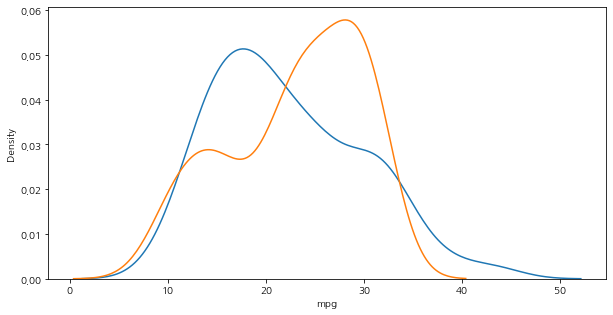

In [31]:
# 예측값과 실제값 비교
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
# 단순회귀분석과 비교했을 때 데이터가 어느 한쪽으로 편향되는 경향은 남아있지만
# 그래프의 첨도가 약간 누그러진 것을 볼 수 있다.

### 3. 분류

- 예측하려는 대상의 속성을 입력 받고, 목표 변수가 갖고 있는 카테고리 값 중 어느 한 값으로 분류하여 예측함.
- 훈련 데이터에 목표 변수 값(0 또는 1)을 함께 입력하기 때문에 지도 학습 유형에 속함
- ex) 고객 분류, 질병 진단, 스팸 메일 필터링, 음성 인식 등 목표 변수가 범주형 값을 가지는 경우 사용

#### 3-1 KNN

- K-Nearest-Neighbors
- 새로운 관측값이 주어졌을 때 기존 데이터 중 가장 속성이 비슷한 k개의 이웃 찾은 뒤 이웃들이 가진 목표 값과 같은 값으로 분류해 예측
- k값에 따라 예측의 정확도가 달라지므로 적절한 k값을 찾는 것이 중요함.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# 데이터 준비
df = sns.load_dataset('titanic')

# 데이터 살펴보기
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 데이터 탐색 및 전처리

# 데이터 자료형 확인
df.info()
# age, embarked, deck, embark_town 열에 NaN값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
# 결측치 처리
rdf = df.drop(['deck','embark_town'],axis=1) # NaN값 많은 deck열과 embarked와 내용 겹치는 embark_town 열 삭제
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [5]:
# age열에 나이 데이터가 없는 모든 행 삭제
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
len(rdf)

714

In [6]:
# embarked 열의 NaN값 최빈값으로 치환
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)

print(rdf.describe(include='all'))

rdf['embarked'].fillna(most_freq, inplace=True)

S
          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000  

In [7]:
# 분석에 사용할 속성 선택
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town') # 열이름에 접두어 붙이기
ndf = pd.concat([ndf,onehot_embarked], axis=1)

ndf.drop(['sex','embarked'],axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [10]:
# 데이터셋 구분

# 속성(변수) 선택
X = ndf[['pclass','age','sibsp','parch','female','male',
        'town_C','town_Q','town_S']]
y = ndf['survived']

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train/test data 구분(7:3)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


분류 모형의 예측력 평가 지표
1. Confusion Matrix
2. 정확도 : TP/(TP+FP)
    - 실제 값이 True인 대상 중 True로 예측하여 모형이 적중한 비율
    - 모형의 완전성 나타내는 지표
    - 재현율이 높다 = False Negative 오류가 낮음
3. 재현율 : TP/(TP+FN)
    - 정확도와 재현율이 균등하게 반영될 수 있도록 정확도와 재현율의 조화 평균 계산
    - 모형의 예측력 종합적으로 평가하는 지표
    - 값이 높을수록 분류 모형의 예측력이 좋다고 할 수 있음.

In [11]:
# KNN 분류 모형
from sklearn.neighbors import KNeighborsClassifier
# 모형 객체 생성
knn = KNeighborsClassifier(n_neighbors = 5)

# train data로 모형 학습
knn.fit(X_train, y_train)

# test data로 y_hat 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [12]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
knn_matrix

array([[109,  16],
       [ 25,  65]], dtype=int64)

In [13]:
# 모형 성능 평가 - 평가 지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)
# f1-score 지표를 보면, 미생존자 예측 정확도가 0.84, 생존자 예측 정확도가 0.76으로
# 예측 능력에 차이가 있다

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



#### 3-2. SVM

- Support Vector Machine
- 데이터셋 여러 속성을 나타내는 데이터프레임의 각 열 -> 열 벡터 형태로 구현됨
- 열 벡터들이 각각 고유의 축을 갖는 벡터 공간을 만드는데, 분석 대상이 되는 개별 관측값은 모든 속성(열 벡터)에 관한 값을 해당 축의 좌표로 표시하여 벡터 공간에서의 위치 나타냄
- SVM모형은 벡터 공간에 위치한 훈련 데이터의 좌표와 각 데이터가 어떤 분류 값을 가져야 하는지 정답을 입력 받아 학습함.
- 같은 분류 값을 갖는 데이터끼리 같은 공간에 위치하도록 벡터 공간을 나눌 수 있다면, 새로운 데이터에 대해서도 어느 공간에 위치하는지 분류할 수 있음.
- SVM모형은 학습을 통해 벡터 공간을 나누는 경계를 찾음 ! 

In [15]:
# SVM 분류 모형
from sklearn import svm

# 모형 객체 생성
svm_model = svm.SVC(kernel='rbf')
# kernel : 데이터를 백터공간으로 매핑하는 함수 , RBF(Radial Basis Function)함수 적용 (Linear,Polynimial,Sigmoid 등 커널 존재)
# 모형 학습
svm_model.fit(X_train,y_train)

# y_hat 예측 (분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [16]:
# 모형 성능 평가
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)

# 평가 지표 게산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)
# 전반적으로 KNN 모형의 예측 능력과 큰 차이가 없다

[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



#### 3-3 Decision Tree

- 의사결정 나무
- 트리구조 사용
- 각 분기점(node)에는 분석 대상의 속성(설명변수)들 위치
- 각 노드마다 목표 값을 가장 잘 분류할 수 있는 속성 찾아 배치하고, 해당 속성이 갖는 값을 이용해 새로운 가지 만듦.
- Entropy : 다른 종류의 값들이 섞여 있는 정도
- Entropy가 낮을수록 분류가 잘 된 것임. 일정 수준 이하로 낮아질 때까지 앞의 과정 반복

In [18]:
# 데이터 준비
# Breast Cancer 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape','adhesion','epithlial',
             'bare_nuclei','chromatin','normal_nucleoli','mitoses','class']

# 데이터 탐색
print(df.head())

# 데이터 자료형 확인
print(df.info())

# 데이터 통계 요약 정보 확인
print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clum

In [23]:
import numpy as np
# bare_nuclei 자료형 변경 (문자->숫자)
print(df['bare_nuclei'].unique())

# ? -> np.nan으로 변경
df['bare_nuclei'].replace('?',np.nan, inplace=True)
# 누락 데이터 행 삭제
df.dropna(subset=['bare_nuclei'],axis=0, inplace=True)
# 자료형 변경
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

['1' '10' '2' '4' '3' '9' '7' nan '5' '8' '6']
                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.00

In [24]:
# 데이터 셋 구분
# 속성 선택
X = df[['clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei',
       'chromatin','normal_nucleoli','mitoses']]
y = df['class']

# 설명 변수 데이터 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (478, 9)
test data 개수:  (205, 9)


In [26]:
# Decision Tree 분류 모형
from sklearn import tree

# 모형 객체 생성
tree_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
# 트리 레벨이 많아질수록 훈련데이터에 대한 예측은 정확해지지만, 훈련데이터에만
# 지나치게 최적화되어 실제 데이터에 대한 예측 능력은 떨어짐.
# 모형 학습
tree_model.fit(X_train,y_train)
# y_hat 예측(분류)
y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [28]:
# 모형 성능 평가
tree_matrix = metrics.confusion_matrix(y_test,y_hat)
print(tree_matrix)

tree_report = metrics.classification_report(y_test,y_hat)
print(tree_report)
# 평균적으로 0.97의 정확도 가짐

[[127   4]
 [  2  72]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



### 4. 군집

- 데이터셋의 관측값이 갖고 있는 여러 속성을 분석해 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터로 묶는 알고리즘
- 다른 클러스터 간 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있음 -> 특이 데이터(이상값,중복값 등) 찾는데 활용
- 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단 -> 비지도학습 유형
- ex) 신용카드 부정 사용  탐지, 구매 패턴 분석 등 소비자 행동 특성 그룹화하는데 사용

#### 4-1. k-Means

- 데이터 간 유사성 측정 기준으로 각 클러스터의 중심까지의 거리 이용
- 벡터 공간에 위치한 어떤 데이터에 대해 k개의 클러스터가 주어졌을 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터 할당
- k값에 따라 모형의 성능 달라짐

In [31]:
import matplotlib.pyplot as plt

# 데이터 준비
# Wholesale customers 데이터셋
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

# 데이터 탐색
print(df.head())
print(df.info())
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [32]:
# 데이터 전처리
# 속성 선택
X = df.iloc[:,:]
print(X[:5])

# 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [33]:
# k-means 군집 모형
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)

# 예측
cluster_label = kmeans.labels_
print(cluster_label)

# 예측 결과 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 4 1 1 0 0 1 1 0 0 4 1 0 0 1 4 1 1 0 4 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 4 4 0 0 0 0 0 4 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 3 0 3 0
 0 0 0 1 1 0 0 0 1 0 0 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 4 2 2 1 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 1 2
 4 2 1 2 2 2 2 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7

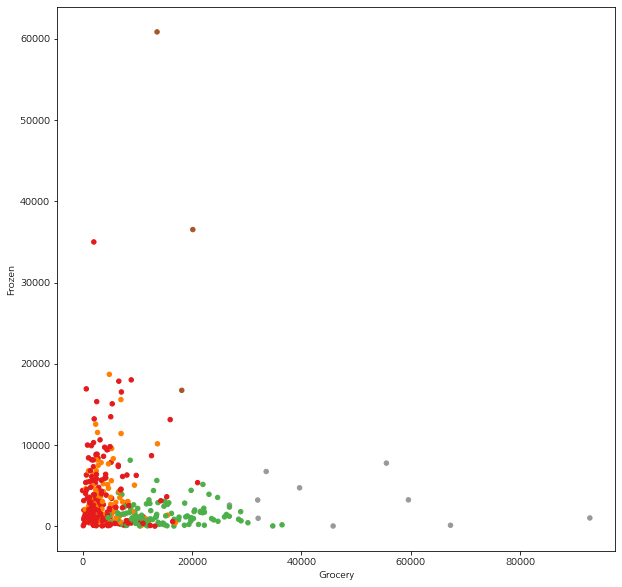

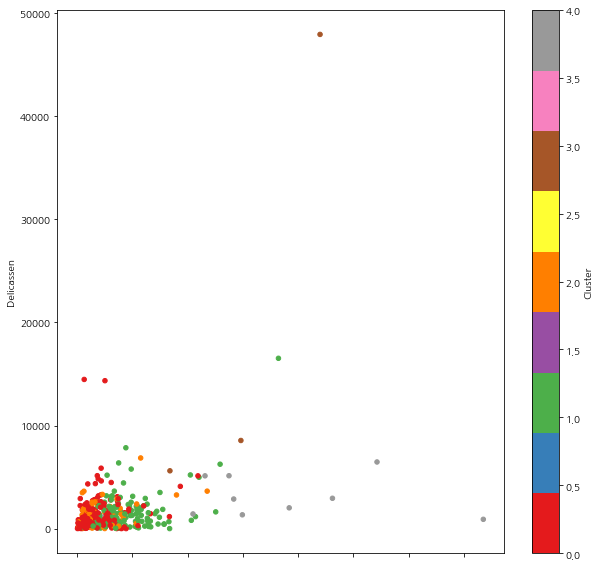

In [34]:
# 시각화
df.plot(kind='scatter', x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True, figsize=(10,10))
plt.show()

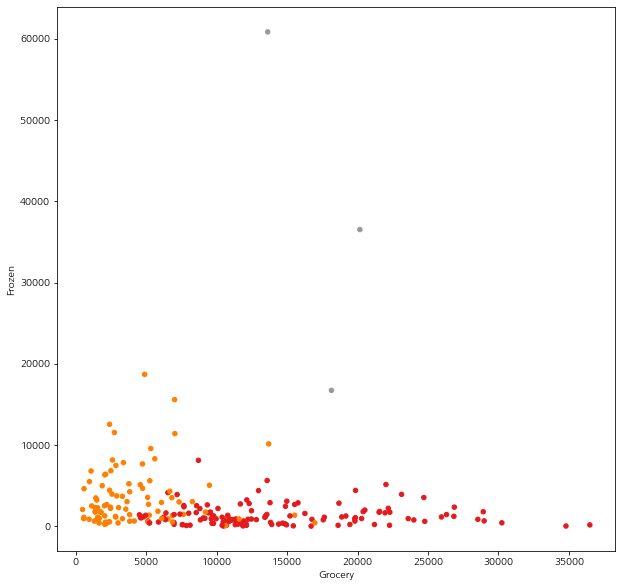

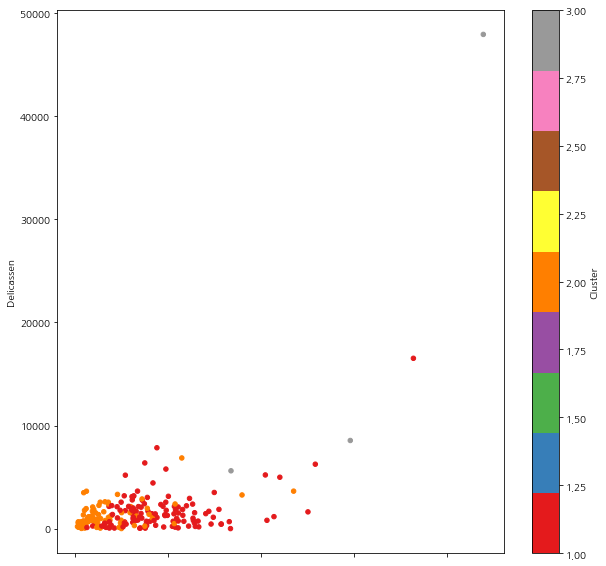

In [35]:
# 큰 값으로 구성된 클러스터(0,4)제외 
mask = (df['Cluster']==0) | (df['Cluster'] == 4)
ndf = df[~mask]
ndf.plot(kind='scatter', x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True, figsize=(10,10))
plt.show()

#### 4-2. DBSCAN

- Density-Based Spatial Clustering of Applications with Noise
- 데이터가 위치하고 있는 공간 밀집도 기준으로 클러스터 구분
- 코어 포인트 : 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점
- 경계 포인트 : 코어 포인트는 아니지만 반지름 R 안에 다른 코어포인트가 있는 경우
- Noise(outlier) : 코어포인트도, 경계포인트도 아닌 점

- 하나의 클러스터는 반지름 R안에 서로 위치하는 모든 코어 포인트를 포함하는 방식으로 구성됨. 
- 서로 밀접한 데이터끼리 하나의 클러스터를 구성하고 어느 클러스터에도 속하지 않는 점들은 Noise로 남는다.

In [38]:
# 라이브러리 불러오기
import folium

# 데이터 준비
# 서울시내 중학교 진학률 데이터셋
file_path = './data/2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0)
df.columns.values

array(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학',
       '취업', '미상', '위도', '경도'], dtype=object)

In [39]:
# 데이터 탐색
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0   지역               학교명  코드  유형  주야  남학생수  여학생수    일반고   특성화고  \
0           0  성북구    서울대학교사범대학부설중학교   3  국립  주간   277     0  0.585  0.148   
1           1  종로구  서울대학교사범대학부설여자중학교   3  국립  주간     0   256  0.680  0.199   
2           2  강남구             개원중학교   3  공립  주간   170   152  0.817  0.047   
3           3  강남구             개포중학교   3  공립  주간    83    72  0.755  0.097   
4           4  서초구             경원중학교   3  공립  주간   199   212  0.669  0.017   

   ...  외고_국제고  예고_체고  마이스터고    자사고    자공고   기타진학  취업     미상         위도  \
0  ...   0.007  0.000  0.011  0.227  0.000  0.004   0  0.000  37.594942   
1  ...   0.035  0.008  0.000  0.043  0.004  0.031   0  0.000  37.577473   
2  ...   0.012  0.003  0.006  0.090  0.003  0.009   0  0.003  37.491637   
3  ...   0.013  0.019  0.019  0.065  0.000  0.019   0  0.000  37.480439   
4  ...   0.010  0.005  0.000  0.282  0.000  0.010   0  0.000  37.510750   

           경도  
0  127.038909  
1  127.003857  
2  127.071744  
3  127.062201  


In [43]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles = 'Stamen Terrain',
                        zoom_start=12)
# 중학교 위치 정보 Circle Marker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat,lng], radius=5, color='brown',
                       fill=True, fill_color='coral',fill_opacity=0.7,
                       popup = name).add_to(mschool_map)
mschool_map

In [44]:
# 데이터 전처리

label_encoder = preprocessing.LabelEncoder() # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder() # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

df.head()

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,자공고,기타진학,취업,미상,위도,경도,location,code,type,day
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,...,0.000,0.004,0,0.000,37.594942,127.038909,16,0,1,0
1,1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,...,0.004,0.031,0,0.000,37.577473,127.003857,22,0,1,0
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,...,0.003,0.009,0,0.003,37.491637,127.071744,0,0,0,0
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,...,0.000,0.019,0,0.000,37.480439,127.062201,0,0,0,0
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,...,0.000,0.010,0,0.000,37.510750,127.008900,14,0,0,0


In [51]:
# DBSCAN 군집 모형
from sklearn import cluster

# 분석에 사용할 속성 선택(과학고, 외고국제고, 자사고 진학률)
columns_list = [10,11,14]
X = df.iloc[:,columns_list]
print(X[:5])

# 설명 변수 데이터 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5) # eps : 기준 반지름 R min_samples:최소 포인트 개수

# 모형 학습
dbm.fit(X)
# 예측
cluster_label = dbm.labels_
print(cluster_label)
# -1 : Noise, 클러스터 : 0,1,2,3

# 예측 결과 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

     과학고  외고_국제고    자사고
0  0.018   0.007  0.227
1  0.000   0.035  0.043
2  0.009   0.012  0.090
3  0.013   0.013  0.065
4  0.007   0.010  0.282
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  1 -1  

In [52]:
# 클러스터 값으로 그룹화하고, 그룹별 내용 출력
grouped_cols = [0,1,3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('*key: ', key)
    print('*number: ', len(group))
    print(group.iloc[:,grouped_cols].head())
    print('\n')
# 클러스터 0 : 외고와 자사고 합격률은 높지만 과학고 합격자가 없음
# 클러스터 1 : 자사고 합격자만 존재
# 클러스터 2 : 자사고 합격률 매우 높고 과학고,외고 합격자 일부 존재
# 클러스터 3 : 과학고 합격자 없이 외고와 자사고 합격자 배출 but 외구 합격률이 0에 비해 현저히 낮음

# 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple',
         5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan'}
cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                        zoom_start=12)
for name,lat,lng,clus in zip(df.학교명,df.위도,df.경도,df.Cluster):
    folium.CircleMarker([lat,lng], radius=5, color=colors[clus],
                       fill=True, fill_color=colors[clus], fill_opacity=0.7,
                       popup = name).add_to(cluster_map)
cluster_map

*key:  -1
*number:  255
   Unnamed: 0   지역  코드    과학고  외고_국제고    자사고
0           0  성북구   3  0.018   0.007  0.227
1           1  종로구   3  0.000   0.035  0.043
2           2  강남구   3  0.009   0.012  0.090
3           3  강남구   3  0.013   0.013  0.065
4           4  서초구   3  0.007   0.010  0.282


*key:  0
*number:  102
    Unnamed: 0   지역  코드  과학고  외고_국제고    자사고
13          13  서초구   3  0.0   0.022  0.038
22          22  강남구   3  0.0   0.019  0.044
28          28  서초구   3  0.0   0.015  0.050
34          34  강남구   3  0.0   0.016  0.065
43          43  송파구   3  0.0   0.021  0.054


*key:  1
*number:  45
     Unnamed: 0    지역  코드  과학고  외고_국제고    자사고
46           46   강동구   3  0.0     0.0  0.044
103         103   양천구   3  0.0     0.0  0.006
118         118   구로구   3  0.0     0.0  0.012
126         126  영등포구   3  0.0     0.0  0.050
175         175   중랑구   3  0.0     0.0  0.004


*key:  2
*number:  8
     Unnamed: 0   지역  코드    과학고  외고_국제고    자사고
20           20  서초구   3  0.003   0.013  0.085


In [55]:
# 학교 설립 유형 추가해 분석
columns_list2 = [10,11,14,23]
X2 = df.iloc[:,columns_list2]
print(X2[:5])

# 설명 변수 데이터 정규화
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

# DBSCAN 모형 객체 생성
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5) # eps : 기준 반지름 R min_samples:최소 포인트 개수

# 모형 학습
dbm2.fit(X2)

df['Cluster2'] = dbm2.labels_

grouped2_cols = [0,1,3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('*key: ', key)
    print('*number: ', len(group))
    print(group.iloc[:,grouped2_cols].head())
    print('\n')

cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                        zoom_start=12)
for name,lat,lng,clus in zip(df.학교명,df.위도,df.경도,df.Cluster2):
    folium.CircleMarker([lat,lng], radius=5, color=colors[clus],
                       fill=True, fill_color=colors[clus], fill_opacity=0.7,
                       popup = name).add_to(cluster2_map)
cluster2_map

     과학고  외고_국제고    자사고  type
0  0.018   0.007  0.227     1
1  0.000   0.035  0.043     1
2  0.009   0.012  0.090     0
3  0.013   0.013  0.065     0
4  0.007   0.010  0.282     0
*key:  -1
*number:  281
   Unnamed: 0   지역  코드    과학고  외고_국제고    자사고  type
0           0  성북구   3  0.018   0.007  0.227     1
1           1  종로구   3  0.000   0.035  0.043     1
2           2  강남구   3  0.009   0.012  0.090     0
3           3  강남구   3  0.013   0.013  0.065     0
4           4  서초구   3  0.007   0.010  0.282     0


*key:  0
*number:  8
     Unnamed: 0   지역  코드  과학고  외고_국제고    자사고  type
22           22  강남구   3  0.0   0.019  0.044     0
43           43  송파구   3  0.0   0.021  0.054     0
51           51  송파구   3  0.0   0.021  0.068     0
93           93  강서구   3  0.0   0.019  0.057     0
164         164  중랑구   3  0.0   0.020  0.062     0


*key:  1
*number:  59
    Unnamed: 0   지역  코드  과학고  외고_국제고    자사고  type
28          28  서초구   3  0.0   0.015  0.050     0
47          47  강동구   3  0.0   0.010 

In [56]:
# 과학고, 외고_국제고 속성 2개로 줄여 예측
columns_list3 = [10,11]
X3 = df.iloc[:,columns_list3]
print(X3[:5])

# 설명 변수 데이터 정규화
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)

# DBSCAN 모형 객체 생성
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5) # eps : 기준 반지름 R min_samples:최소 포인트 개수

# 모형 학습
dbm3.fit(X3)

df['Cluster3'] = dbm3.labels_

grouped3_cols = [0,1,3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('*key: ', key)
    print('*number: ', len(group))
    print(group.iloc[:,grouped3_cols].head())
    print('\n')

cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                        zoom_start=12)
for name,lat,lng,clus in zip(df.학교명,df.위도,df.경도,df.Cluster3):
    folium.CircleMarker([lat,lng], radius=5, color=colors[clus],
                       fill=True, fill_color=colors[clus], fill_opacity=0.7,
                       popup = name).add_to(cluster3_map)
cluster3_map

     과학고  외고_국제고
0  0.018   0.007
1  0.000   0.035
2  0.009   0.012
3  0.013   0.013
4  0.007   0.010
*key:  -1
*number:  61
   Unnamed: 0   지역  코드    과학고  외고_국제고
0           0  성북구   3  0.018   0.007
3           3  강남구   3  0.013   0.013
6           6  강남구   3  0.015   0.036
7           7  강남구   3  0.032   0.005
8           8  강남구   3  0.013   0.029


*key:  0
*number:  160
    Unnamed: 0   지역  코드  과학고  외고_국제고
1            1  종로구   3  0.0   0.035
13          13  서초구   3  0.0   0.022
22          22  강남구   3  0.0   0.019
28          28  서초구   3  0.0   0.015
29          29  강남구   3  0.0   0.007


*key:  1
*number:  111
    Unnamed: 0   지역  코드    과학고  외고_국제고
2            2  강남구   3  0.009   0.012
4            4  서초구   3  0.007   0.010
5            5  강남구   3  0.007   0.007
11          11  강남구   3  0.007   0.024
14          14  서초구   3  0.010   0.013


*key:  2
*number:  50
     Unnamed: 0    지역  코드  과학고  외고_국제고
46           46   강동구   3  0.0     0.0
103         103   양천구   3  0.0     0.0
